In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings('ignore')

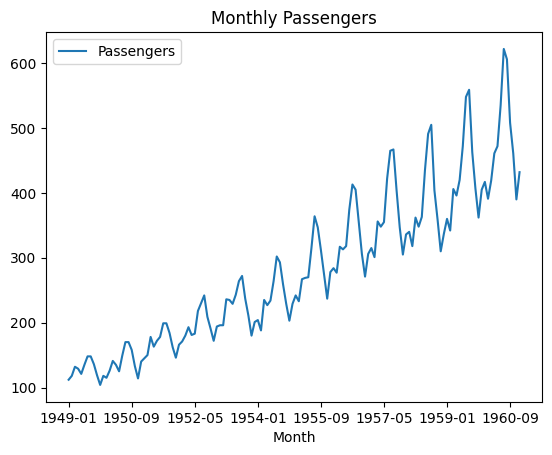

In [2]:
passengers= pd.read_csv("AirPassengers.csv", index_col=0)
passengers.plot()
plt.title("Monthly Passengers")
plt.show()

In [3]:
# passengers.resample('Q').sum()  ---Error

In [4]:
passengers.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
# Q for Quarterly

In [6]:
type(passengers.index)

pandas.core.indexes.base.Index

In [7]:
passengers.index= pd.to_datetime(passengers.index).to_period("M")

In [8]:
type(passengers.index)

pandas.core.indexes.period.PeriodIndex

In [9]:
passengers.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [10]:
m_pass= passengers.resample('Q').sum()

In [11]:
m_pass.head()

,Passengers
Month,
1949Q1,362
1949Q2,385
1949Q3,432
1949Q4,341
1950Q1,382


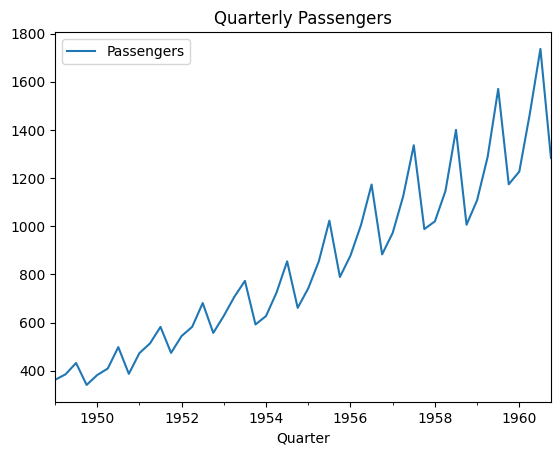

In [12]:
m_pass= passengers.resample('Q').sum()
m_pass.index.rename('Quarter', inplace=-True)
m_pass.plot()
plt.title("Quarterly Passengers")
plt.show()

In [13]:
# Quarterly is more smoother than Monthly (Seasonal+Linear)

In [18]:
m_pass= passengers.resample('Y').sum()
m_pass.head()

,Passengers
Month,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700


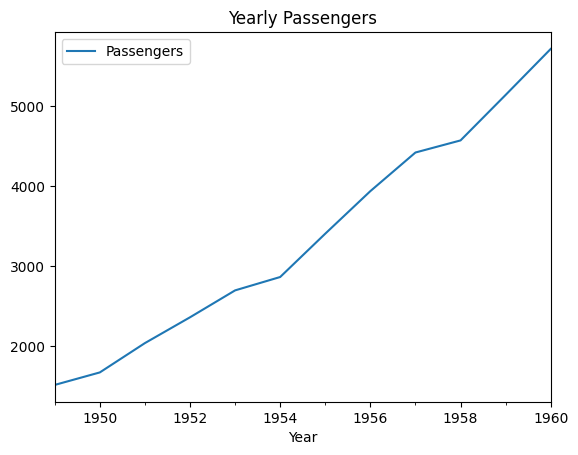

In [17]:
m_pass= passengers.resample('Y').sum()
m_pass.index.rename('Year', inplace=-True)
m_pass.plot()
plt.title("Yearly Passengers")
plt.show()

### Decomposition

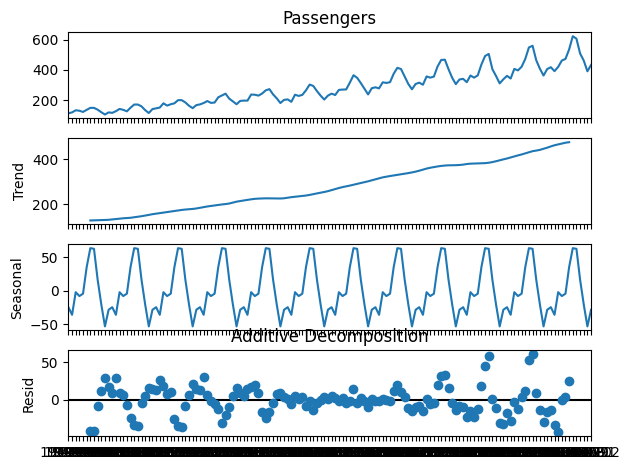

In [22]:
passengers= pd.read_csv("AirPassengers.csv", index_col=0)
result= seasonal_decompose(passengers['Passengers'], model='additive', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

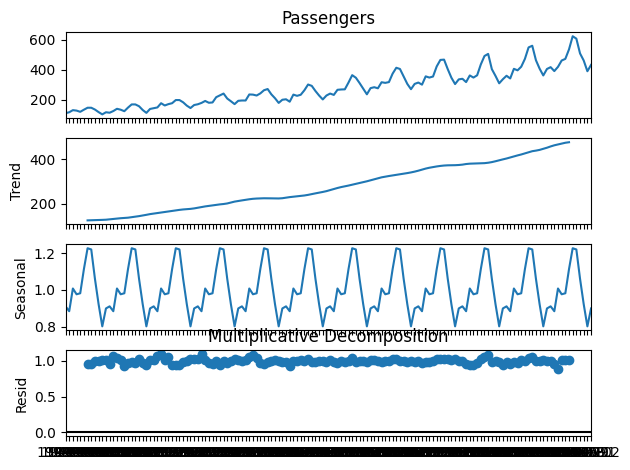

In [21]:
result= seasonal_decompose(passengers['Passengers'], model='multiplicative', period=12)
result.plot()
plt.title("Multiplicative Decomposition")
plt.show()

### Centered Moving Average (Rolling Centered Mean)

In [26]:
# With both Original Data and Centered Rolling Mean

In [24]:
y= passengers['Passengers']

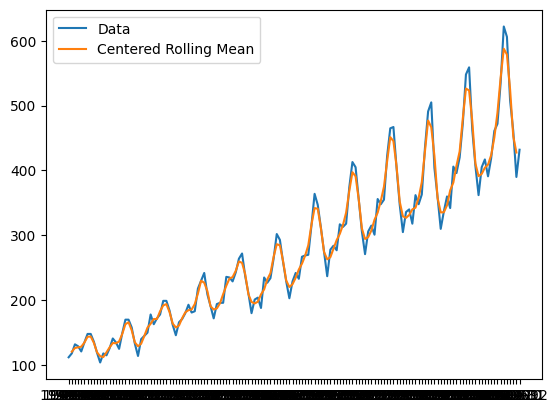

In [44]:
span=3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label= 'Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

In [47]:
# If  Center= True, set the window labels as the center of the window index.

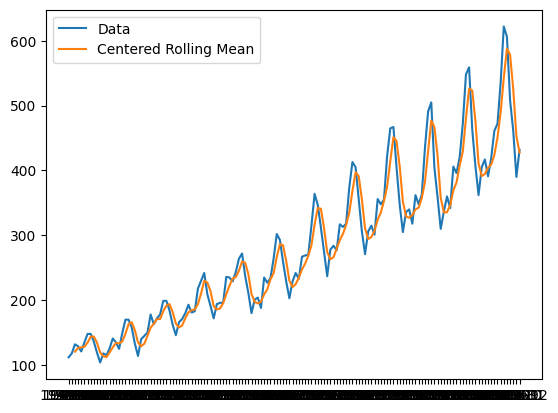

In [45]:
span=3
fcast = y.rolling(span, center=False).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label= 'Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

In [48]:
# If Center= False, set the window labels as the right edge of the window index.

In [50]:
# only Centered Rolling Mean

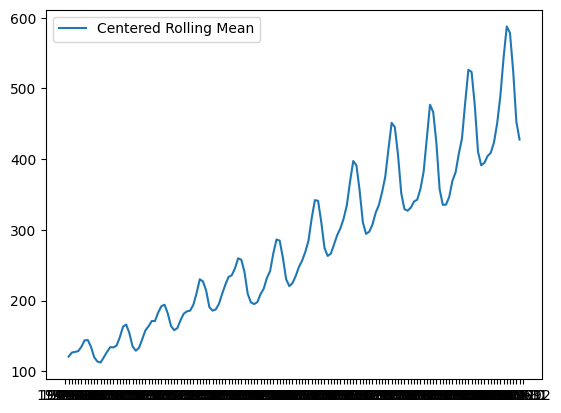

In [27]:
span=3
fcast = y.rolling(span, center=True).mean()
plt.plot(fcast, label= 'Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

In [49]:
# Only Original Data

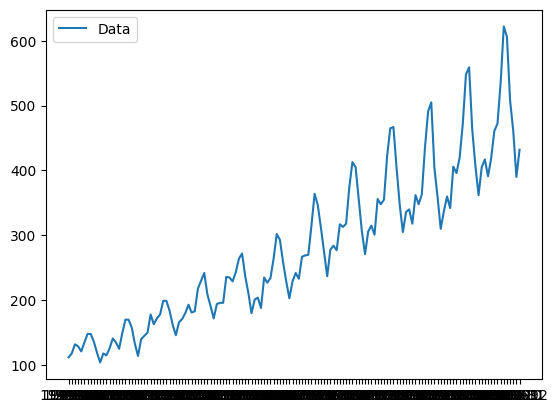

In [30]:
span=3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.legend(loc='best')
plt.show()

In [42]:
# increasing span

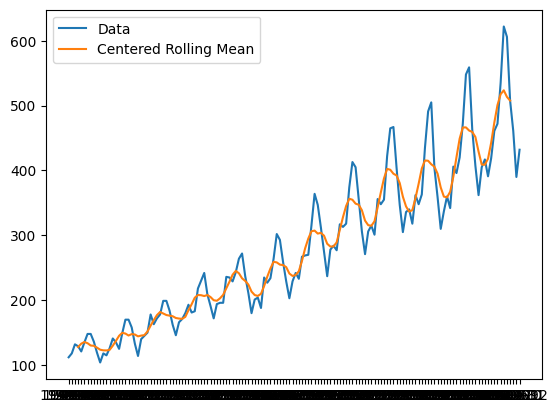

In [41]:
span=7
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label= 'Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

In [54]:
#Temporal Train test Split
y_train= y[:132]
y_test= y[132:]
y_train.shape, y_test.shape

((132,), (12,))

In [55]:
print(y_train.index)
print(y_test.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
       '1959-09', '1959-10', '1959-11', '1959-12'],
      dtype='object', name='Month', length=132)
Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month')


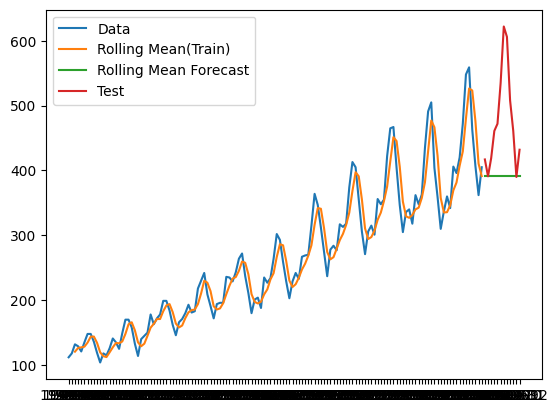

In [63]:
span= 3
fcast = y_train.rolling(span, center=False).mean()
MA = fcast.iloc[-1]
MA_fcast= pd.Series(MA.repeat(len(y_test)), index= y_test.index)
plt.plot(y_train, label='Data')
plt.plot(fcast, label= 'Rolling Mean(Train)')
plt.plot(MA_fcast, label= 'Rolling Mean Forecast' )
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

In [66]:
root_mean_squared_error(y_test, MA_fcast)

112.85462625283321

In [61]:
span=3
fcast= y_train.rolling(span, center=False).mean()
MA= fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
root_mean_squared_error(y_test, MA_fcast)

112.85462625283321

In [59]:
span=7
fcast= y_train.rolling(span, center=False).mean()
MA= fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
root_mean_squared_error(y_test, MA_fcast)

76.28653914303472

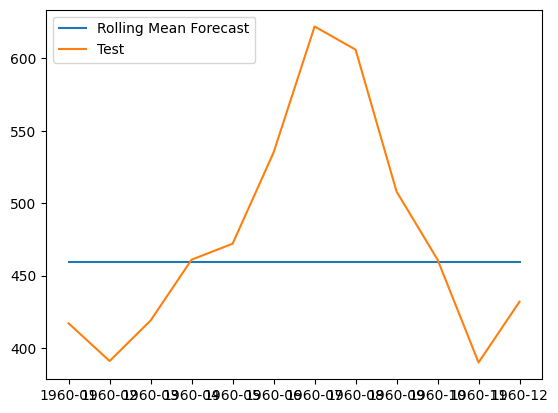

In [60]:
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()


### Simple Exponential Smoothing

In [92]:
alpha=0.3
ses= SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(y_test))


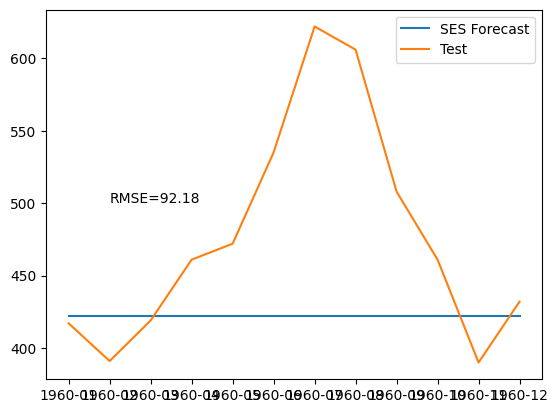

In [93]:
ses_fcast = pd.Series(fcast1, index=y_test.index)
error= round(root_mean_squared_error(y_test, ses_fcast),2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(ses_fcast, label='SES Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

### Holt's Linear Trend

In [98]:
holt = Holt(y_train)
alpha,beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

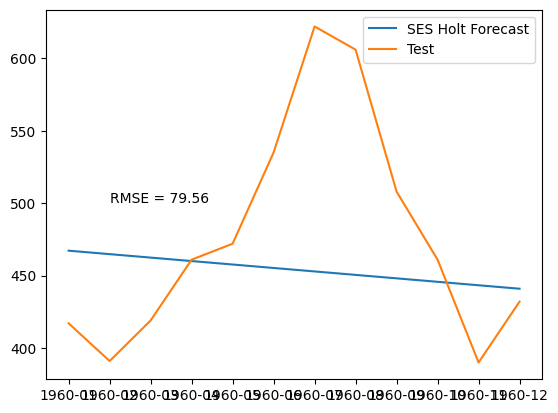

In [103]:
holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)

plt.text(1,500,"RMSE = "+str(error))
plt.plot(holt_fcast,label="SES Holt Forecast")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

### Holts exponential Trend

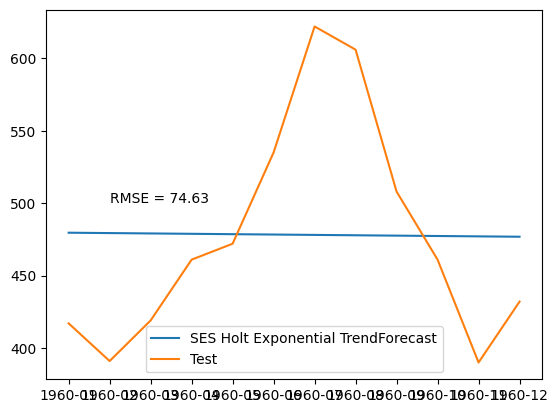

In [104]:
holt = Holt(y_train,exponential=True)
alpha,beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)

plt.text(1,500,"RMSE = "+str(error))
plt.plot(holt_fcast,label="SES Holt Exponential TrendForecast")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

### Adaptive Damped Trend

In [ ]:
holt = Holt(y_train,exponential=True)
alpha,beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)

plt.text(1,500,"RMSE = "+str(error))
plt.plot(holt_fcast,label="SES Holt Exponential TrendForecast")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

### Holt-Winters Additive Trend

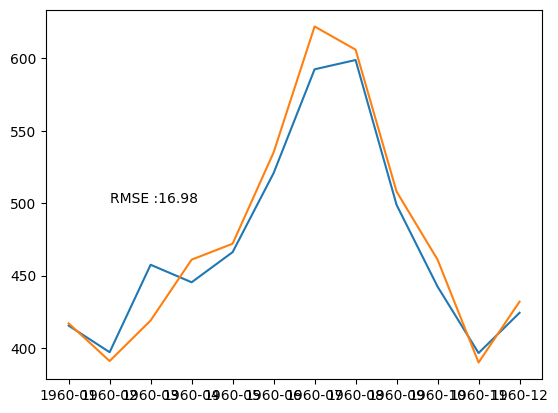

In [116]:
alpha,beta,gamma= 0.2,0.1,0.4
hw_a = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3= hw_a.fit()
fcast = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast,index = y_test.index)
error = round(root_mean_squared_error(y_test,hw_a_fcast),2)
plt.text(1,500,"RMSE :" +str(error))
plt.plot(hw_a_fcast)
plt.plot(y_test)